<a href="https://colab.research.google.com/github/ritwiks9635/Question-Answering-Model/blob/main/Question_Answering_Model_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🌜Question Answering Model🌛**

In [ ]:
!unzip /content/Jee_Exam_peper.zip

In [ ]:
! pip install PyMuPDF

## **Data Preprocessing**

In [12]:
import os
import fitz
import re
import random
import pandas as pd

def extract_all_questions_with_options(pdf_path):
    questions_with_options = []
    doc = fitz.open(pdf_path)

    current_question = ""
    current_options = []
    capturing_question = False

    for page_num, page in enumerate(doc):
        lines = page.get_text("text").splitlines()

        for line in lines:
            line = line.strip()


            if re.match(r"^(JEE|SECTION|END OF THE QUESTION PAPER|\d+/\d+|Paper)", line):
                continue


            if re.match(r"^Q\.\d+", line):

                if current_question and current_options:
                    questions_with_options.append({
                        "question": re.sub(r"^Q\.\d+\s*", "", current_question.strip()),  # Remove Q.1, Q.2, etc.
                        "options": current_options
                    })


                current_question = line
                current_options = []
                capturing_question = True


            elif re.match(r"^\([A-D]\)", line):

                current_options.append(re.sub(r"^\([A-D]\)\s*", "", line).strip())


            elif capturing_question:
                current_question += " " + line


    if current_question and current_options:
        questions_with_options.append({
            "question": re.sub(r"^Q\.\d+\s*", "", current_question.strip()),
            "options": current_options
        })

    doc.close()
    return questions_with_options

def process_all_pdfs_in_folder(folder_path):
    all_data = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.pdf'):
            subject = filename.split('_')[0]
            pdf_path = os.path.join(folder_path, filename)
            print(f"Processing file: {filename}")
            file_data = extract_all_questions_with_options(pdf_path)


            for item in file_data:
                question = re.sub(r'\s+', ' ', item['question']).strip()
                options = [re.sub(r'\s+', ' ', opt).strip() for opt in item['options']]


                if len(options) == 4 and all(opt != "" for opt in options):
                    all_data.append({
                        'Subject': subject,
                        'Question': question,
                        'Option A': options[0],
                        'Option B': options[1],
                        'Option C': options[2],
                        'Option D': options[3]
                    })


    df = pd.DataFrame(all_data)
    return df


folder_path = "/content/Jee_Exam_peper"  # Update this path to your folder
df = process_all_pdfs_in_folder(folder_path)


df.to_csv("/content/all_preprocessed_questions_3.csv", index=False)

Processing file: Physics_8.pdf
Processing file: Chemistry_2.pdf
Processing file: Chemistry_3.pdf
Processing file: Chemistry_11.pdf
Processing file: Physics_10.pdf
Processing file: Math_12.pdf
Processing file: Chemistry_12.pdf
Processing file: Physics_6.pdf
Processing file: Math_3.pdf
Processing file: Chemistry_8.pdf
Processing file: Chemistry_10.pdf
Processing file: Chemistry_9.pdf
Processing file: Math_6.pdf
Processing file: Math_8.pdf
Processing file: Chemistry_6.pdf
Processing file: Physics_9.pdf
Processing file: Chemistry_4.pdf
Processing file: Physics_12.pdf
Processing file: Math_1.pdf
Processing file: Math_2.pdf
Processing file: Physics_11.pdf
Processing file: Chemistry_5.pdf
Processing file: Math_4.pdf
Processing file: Physics_4.pdf
Processing file: Chemistry_7.pdf
Processing file: Physics_2.pdf
Processing file: Physics_7.pdf
Processing file: Math_5.pdf
Processing file: Math_9.pdf
Processing file: Physics_5.pdf
Processing file: Chemistry_1.pdf
Processing file: Math_11.pdf
Proces

In [4]:
df.head()

,Subject,Question,Option A,Option B,Option C,Option D
0,Physics,A football of radius R is kept on a hole of ra...,sin𝜃=,tan𝜃=,sin𝜃=,cos𝜃=
1,Physics,A light disc made of aluminium (a nonmagnetic ...,rotate in the direction opposite to the direct...,rotate in the same direction as the direction ...,not rotate and its temperature will remain unc...,not rotate but its temperature will slowly rise
2,Physics,A particle of mass m moves in circular orbits ...,𝑅∝𝑛1 3,𝑅∝𝑛2 3,𝐸=,𝐸= 2 (
3,Physics,The filament of a light bulb has surface area ...,power radiated by the filament is in the range...,radiated power entering into one eye of the ob...,the wavelength corresponding to the maximum in...,taking the average wavelength of emitted radia...
4,Physics,Sometimes it is convenient to construct a syst...,𝛼+ 𝑝= 2𝛽,𝑝+ 𝑞−𝑟= 𝛽,𝑝−𝑞+ 𝑟= 𝛼,𝑝+ 𝑞+ 𝑟= 𝛽


In [5]:
df.shape

(304, 6)

## **AI-Powered Question Generator:**

In [4]:
%pip install -U -q 'google-generativeai>=0.8.3'

In [5]:
import google.generativeai as genai
from IPython.display import Markdown, display

[GEMINI API KEYS](https://aistudio.google.com/app/apikey)

In [6]:
genai.configure(api_key= "gemini_api_keys")

In [7]:
for model in genai.list_models():
  if model.name == 'models/gemini-1.5-flash-001':
    print(model)
    break

Model(name='models/gemini-1.5-flash-001',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001',
      description='Fast and versatile multimodal model for scaling across diverse tasks',
      input_token_limit=1000000,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createCachedContent'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)


In [8]:
from google.api_core import retry

In [9]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-latest',
    generation_config=genai.GenerationConfig(
        temperature=0.7,
        top_p=0.9,
        max_output_tokens=300
    )
)

In [12]:
retry_policy = {
    "retry": retry.Retry(
        predicate=retry.if_transient_error,
        initial=5,
        multiplier=1.3,
        timeout=60
    )
}

In [10]:
import os
import time
import random

# Instructions for the model
instructions = """
You are an advanced MCQ question generation model specializing in subjects like Physics, Chemistry, and Mathematics.
Your goal is to generate high-quality MCQ questions with 4 options based on the provided subject and difficulty level.
Each response should include:
- A unique question
- 4 plausible options (A, B, C, D)
- A clear alignment with the given subject and difficulty.
- Do not provide the correct answer.
Ensure all options are logically consistent with the question's context.
"""

# Function to create the combined prompt
def create_combined_prompt(instructions, examples, task_prompt):
    return f"{instructions}\n\nExamples:\n{examples}\n\nTask:\n{task_prompt}"

# Generate example prompts
def generate_examples(df, n=10):
    examples = [
        {
            "Input": f"Subject: {row['Subject']} Difficulty: Medium Task: Generate an MCQ question with four options.",
            "Output": {
                "Question": row["Question"],
                "Options": {
                    "A": row["Option A"],
                    "B": row["Option B"],
                    "C": row["Option C"],
                    "D": row["Option D"]
                }
            }
        }
        for _, row in df.sample(n=n).iterrows()
    ]
    # Convert examples to Markdown format
    examples_text = "\n\n".join(
        f"**Input:** Subject: {ex['Input'].split('Difficulty:')[0].strip()} Difficulty: Medium\n\n"
        f"**Output:**\n\n"
        f"**Question:** {ex['Output']['Question']}\n"
        f"**Options:**\n"
        f"- A: {ex['Output']['Options']['A']}\n"
        f"- B: {ex['Output']['Options']['B']}\n"
        f"- C: {ex['Output']['Options']['C']}\n"
        f"- D: {ex['Output']['Options']['D']}\n"
        for ex in examples
    )
    return examples_text

# Function to ask and interact with questions
def ask_questions_gemini(df, subject, difficulty="medium"):
    history = []  # To store question-answer history

    while True:
        # Prepare the examples
        examples_text = generate_examples(df)

        # Define the task-specific prompt
        task_prompt = f"Generate {subject} question with {difficulty} difficulty."

        # Combine instructions, examples, and task
        combined_prompt = create_combined_prompt(instructions, examples_text, task_prompt)

        # Send the prompt to the Gemini model
        start_time = time.time()
        response = model.generate_content([combined_prompt]) # request_options=retry_policy)
        end_time = time.time()

        # Parse and display the generated question
        generated_question = response.text
        print("\n--- Generated MCQ ---")
        print(generated_question)
        print(f"\n[Time Taken: {round(end_time - start_time, 2)} seconds]\n")

        # Prompt user for an answer
        while True:
            user_input = input("Your Answer (A, B, C, D), 'skip' to skip, or 'exit' to end: ").strip().upper()
            if user_input in ["A", "B", "C", "D"]:
                print(f"Your answer: {user_input}")
                history.append({"question": generated_question, "user_answer": user_input, "time_taken": round(end_time - start_time, 2)})
                break
            elif user_input == "SKIP":
                print("You chose to skip the question.")
                history.append({"question": generated_question, "user_answer": "Skipped", "time_taken": round(end_time - start_time, 2)})
                break
            elif user_input == "EXIT":
                print("\nExiting quiz...")
                print("\n--- Question History ---")
                for i, entry in enumerate(history, start=1):
                    print(f"\nQuestion {i}: {entry['question']}")
                    print(f"Your Answer: {entry['user_answer']}")
                    print(f"Time Taken: {entry['time_taken']} seconds")
                return
            else:
                print("Invalid input. Please choose A, B, C, D, 'skip', or 'exit'.")

# Example Usage
# Assuming `df` contains your dataset with columns: Subject, Question, Option A, Option B, Option C, Option D
subject_choice = input("Choose subject (Chemistry, Math, Physics): ").capitalize()
difficulty_level = input("Choose difficulty level (easy, medium, hard): ").lower()
ask_questions_gemini(df, subject_choice, difficulty_level)

Choose subject (Chemistry, Math, Physics): Math
Choose difficulty level (easy, medium, hard): Easy

--- Generated MCQ ---
**Question:**  If a rectangle has a length of 10 cm and a width of 5 cm, what is its area?

**Options:**

A: 15 cm²
B: 25 cm²
C: 50 cm²
D: 100 cm²


[Time Taken: 2.3 seconds]

Your Answer (A, B, C, D), 'skip' to skip, or 'exit' to end: Skip
You chose to skip the question.

--- Generated MCQ ---
**Question:**  What is the value of x in the equation 3x + 6 = 15?

**Options:**
- A: 1
- B: 2
- C: 3
- D: 4


[Time Taken: 3.25 seconds]

Your Answer (A, B, C, D), 'skip' to skip, or 'exit' to end: A
Your answer: A

--- Generated MCQ ---
**Question:**  What is the value of x in the equation 2x + 5 = 11?

**Options:**
- A: 1
- B: 2
- C: 3
- D: 4


[Time Taken: 1.79 seconds]

Your Answer (A, B, C, D), 'skip' to skip, or 'exit' to end: Exit

Exiting quiz...

--- Question History ---

Question 1: **Question:**  If a rectangle has a length of 10 cm and a width of 5 cm, what is it

## **Customizable Quizzes**

In [11]:
question_metadata = {
    "Chemistry": [
        {"id": "Q1", "topic": "Organic Chemistry", "chapter": "Hydrocarbons", "difficulty": "easy"},
        {"id": "Q2", "topic": "Inorganic Chemistry", "chapter": "Coordination Compounds", "difficulty": "medium"},
    ],
    "Math": [
        {"id": "Q1", "topic": "Algebra", "chapter": "Linear Equations", "difficulty": "easy"},
        {"id": "Q2", "topic": "Calculus", "chapter": "Differentiation", "difficulty": "hard"},
    ],
    "Physics": [
        {"id": "Q1", "topic": "Mechanics", "chapter": "Laws of Motion", "difficulty": "medium"},
        {"id": "Q2", "topic": "Optics", "chapter": "Ray Optics", "difficulty": "hard"},
    ]
}

# Filter Questions Based on Criteria
def filter_questions(subject, topic, chapter, difficulty):
    return [
        q for q in question_metadata.get(subject, [])
        if q["topic"] == topic and q["chapter"] == chapter and q["difficulty"] == difficulty
    ]

# Generate Questions using Gemini
def generate_question_gemini(subject, topic, chapter, difficulty):
    prompt = f"""
    Generate a {difficulty} difficulty multiple-choice question on {subject}.
    Topic: {topic}
    Chapter: {chapter}
    Include:
    - One unique question
    - Four plausible options (A, B, C, D)
    - Do not provide the correct answer.
    """
    response = model.generate_content([prompt]) #, request_options=retry_policy)
    return response.text

# Create a Quiz
def create_quiz(subject, topic, chapter, difficulty, num_questions=5):
    filtered_questions = filter_questions(subject, topic, chapter, difficulty)
    if len(filtered_questions) < num_questions:
        print(f"Only {len(filtered_questions)} questions match your criteria. Generating {len(filtered_questions)} questions.")
        selected_questions = filtered_questions
    else:
        selected_questions = random.sample(filtered_questions, num_questions)

    print(f"\nCreating a {difficulty} quiz on {subject} - {topic} - {chapter}")
    for i, question in enumerate(selected_questions, start=1):
        print(f"\nQuestion {i}:")
        print(generate_question_gemini(subject, topic, chapter, difficulty))

# Add a Question
def add_question():
    subject = input("Enter subject (Chemistry, Math, Physics): ").capitalize()
    if subject not in question_metadata:
        print("Invalid subject.")
        return

    topic = input("Enter topic (e.g., Algebra, Organic Chemistry): ")
    chapter = input("Enter chapter (e.g., Linear Equations, Hydrocarbons): ")
    difficulty = input("Enter difficulty (easy, medium, hard): ").lower()
    if difficulty not in ["easy", "medium", "hard"]:
        print("Invalid difficulty level.")
        return

    question_text = input("Enter the question text: ")
    options = {}
    for opt in ["A", "B", "C", "D"]:
        options[opt] = input(f"Enter option {opt}: ")

    new_question_id = f"Q{len(question_metadata[subject]) + 1}"
    question_metadata[subject].append({
        "id": new_question_id,
        "topic": topic,
        "chapter": chapter,
        "difficulty": difficulty
    })

    print(f"Question {new_question_id} added successfully.")

# Teacher Interface
def teacher_interface():
    while True:
        action = input("\nChoose an action: 'create' to create a quiz, 'add' to add a question, or 'exit' to quit: ").lower()
        if action == "add":
            add_question()
        elif action == "create":
            subject = input("Choose subject (Chemistry, Math, Physics): ").capitalize()
            if subject not in question_metadata:
                print("Invalid subject.")
                continue

            topics = list(set(q["topic"] for q in question_metadata[subject]))
            topic = input(f"Choose topic {topics}: ")
            if topic not in topics:
                print("Invalid topic.")
                continue

            chapters = list(set(q["chapter"] for q in question_metadata[subject] if q["topic"] == topic))
            chapter = input(f"Choose chapter {chapters}: ")
            if chapter not in chapters:
                print("Invalid chapter.")
                continue

            difficulty = input("Choose difficulty level (easy, medium, hard): ").lower()
            if difficulty not in ["easy", "medium", "hard"]:
                print("Invalid difficulty level.")
                continue

            num_questions = int(input("Enter number of questions: "))
            create_quiz(subject, topic, chapter, difficulty, num_questions)
        elif action == "exit":
            print("Exiting...")
            break
        else:
            print("Invalid action.")

# Run the Interface
teacher_interface()


Choose an action: 'create' to create a quiz, 'add' to add a question, or 'exit' to quit: create
Choose subject (Chemistry, Math, Physics): Math
Choose topic ['Calculus', 'Algebra']: Calculus
Choose chapter ['Differentiation']: Differentiation
Choose difficulty level (easy, medium, hard): Easy
Enter number of questions: 1
Only 0 questions match your criteria. Generating 0 questions.

Creating a easy quiz on Math - Calculus - Differentiation

Choose an action: 'create' to create a quiz, 'add' to add a question, or 'exit' to quit: add
Enter subject (Chemistry, Math, Physics): Math
Enter topic (e.g., Algebra, Organic Chemistry): Algebra
Enter chapter (e.g., Linear Equations, Hydrocarbons): Hydrocarbons
Enter difficulty (easy, medium, hard): Easy
Enter the question text: 1 + 1 = ?
Enter option A: 1
Enter option B: 2
Enter option C: 3
Enter option D: 4
Question Q3 added successfully.

Choose an action: 'create' to create a quiz, 'add' to add a question, or 'exit' to quit: Exit
Exiting...


## **Daily Practice Problems (DPPs):**

In [16]:
question_metadata = {
    "Chemistry": [
        {"id": "Q1", "difficulty": "easy"},
        {"id": "Q2", "difficulty": "medium"},
        {"id": "Q3", "difficulty": "hard"},
    ],
    "Math": [
        {"id": "Q1", "difficulty": "easy"},
        {"id": "Q2", "difficulty": "medium"},
        {"id": "Q3", "difficulty": "hard"},
    ],
    "Physics": [
        {"id": "Q1", "difficulty": "easy"},
        {"id": "Q2", "difficulty": "medium"},
        {"id": "Q3", "difficulty": "hard"},
    ]
}

# Define folders
daily_practice_folder = "daily_practice_sets"
os.makedirs(daily_practice_folder, exist_ok=True)

# Generate a question using the Gemini model
def generate_question_gemini(subject, difficulty):
    prompt = f"""
    Generate a {difficulty} difficulty multiple-choice question for {subject}.
    Include:
    - A unique question
    - Four plausible options (A, B, C, D)
    - Do not provide the correct answer.
    """
    response = model.generate_content([prompt]) #, request_options=retry_policy)
    time.sleep(1)
    return response.text

# Generate a Daily Practice Problem (DPP) set
def generate_daily_practice_set(num_questions_per_difficulty=2):
    daily_set = {}

    for subject in question_metadata:
        daily_set[subject] = []

        for difficulty in ["easy", "medium", "hard"]:
            # Dynamically generate questions
            for _ in range(num_questions_per_difficulty):
                question_content = generate_question_gemini(subject, difficulty)
                daily_set[subject].append({
                    "difficulty": difficulty,
                    "content": question_content
                })

    return daily_set


def save_daily_practice_set(daily_set):
    filename = f"DPP_{date.today()}.txt"
    filepath = os.path.join(daily_practice_folder, filename)

    with open(filepath, "w") as f:
        for subject, questions in daily_set.items():
            f.write(f"\n--- {subject} Daily Practice ---\n")
            for question in questions:
                f.write(f"[{question['difficulty'].capitalize()}]\n{question['content']}\n")

    print(f"Daily Practice Problems saved to {filepath}")


daily_set = generate_daily_practice_set(num_questions_per_difficulty=1)
save_daily_practice_set(daily_set)

Daily Practice Problems saved to daily_practice_sets/DPP_2024-11-17.txt


##**Performance Dashboard**

Choose subject (Chemistry, Math, Physics): Math
Choose difficulty level (easy, medium, hard): Easy

Generating Question 1...

Question 1:
A farmer has 12 sheep and all but 5 die. How many sheep are left?

A) 7
B) 5
C) 12
D) 0

Your Answer (A, B, C, D), or type 'skip' to skip and 'exit' to exit: A
Answer recorded!

Generating Question 2...

Question 2:
What is the result of 15 + 6 - 3 × 2?

A) 15
B) 21
C) 9
D) 18

Your Answer (A, B, C, D), or type 'skip' to skip and 'exit' to exit: A
Answer recorded!

Generating Question 3...

Question 3:
A baker has 12 cupcakes.  He wants to put them into boxes, with 3 cupcakes in each box. How many boxes will he need?

A) 2
B) 4
C) 6
D) 9

Your Answer (A, B, C, D), or type 'skip' to skip and 'exit' to exit: A
Answer recorded!

Generating Question 4...

Question 4:
What is the result of 15 + 6 - 4 × 2?

A) 13
B) 23
C) 17
D) 37

Your Answer (A, B, C, D), or type 'skip' to skip and 'exit' to exit: Skip
Skipping to the next question...

Generating Questio

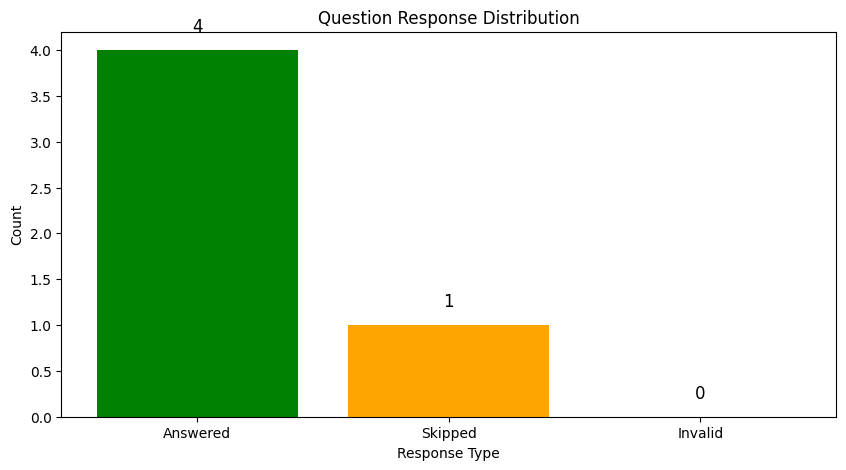

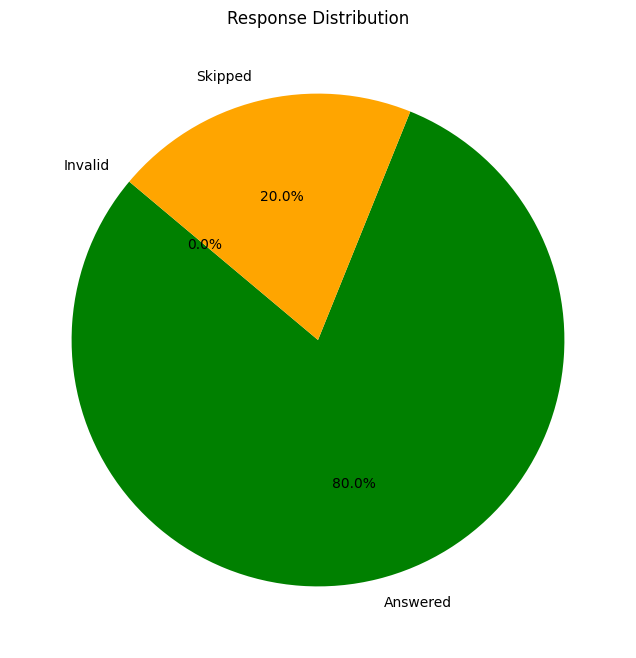

In [20]:
def generate_mcq(subject, difficulty):
    prompt = f"""
    Generate a {difficulty} difficulty multiple-choice question for {subject}.
    Include:
    - A unique question
    - Four plausible options (A, B, C, D)
    - Do not provide the correct answer.
    """
    response = model.generate_content([prompt])#, request_options=retry_policy)
    return response.text

# Function to ask questions and capture responses with time tracking
def ask_questions(subject, difficulty="medium"):
    responses = []
    num_questions = 5  # Number of questions per seasons

    for question_index in range(num_questions):
        print(f"\nGenerating Question {question_index + 1}...")
        question_text = generate_mcq(subject, difficulty)
        print(f"\nQuestion {question_index + 1}:\n{question_text}")

        start_time = time.time()
        user_answer = input("Your Answer (A, B, C, D), or type 'skip' to skip and 'exit' to exit: ").upper()
        end_time = time.time()

        time_taken = end_time - start_time

        if user_answer == "EXIT":
            print("Exiting quiz...")
            break
        elif user_answer == "SKIP":
            print("Skipping to the next question...")
            responses.append({"question": question_text, "answer": "Skipped", "time_taken": time_taken})
        elif user_answer in ["A", "B", "C", "D"]:
            print("Answer recorded!")
            responses.append({"question": question_text, "answer": user_answer, "time_taken": time_taken})
        else:
            print("Invalid input. Skipping this question...")
            responses.append({"question": question_text, "answer": "Invalid", "time_taken": time_taken})

    display_dashboard(responses)

# Function to display the performance dashboard
def display_dashboard(responses):
    total_questions = len(responses)
    answered_questions = sum(1 for r in responses if r["answer"] not in ["Skipped", "Invalid"])
    skipped_questions = sum(1 for r in responses if r["answer"] == "Skipped")
    invalid_responses = sum(1 for r in responses if r["answer"] == "Invalid")
    total_time = sum(r["time_taken"] for r in responses)
    avg_time_per_question = total_time / total_questions if total_questions > 0 else 0

    # Display Metrics
    print("\n--- Performance Dashboard ---")
    print(f"Total Questions: {total_questions}")
    print(f"Answered Questions: {answered_questions}")
    print(f"Skipped Questions: {skipped_questions}")
    print(f"Invalid Responses: {invalid_responses}")
    print(f"Average Time per Question: {avg_time_per_question:.2f} seconds")

    # Display Performance History
    print("\n--- Performance History ---")
    for i, response in enumerate(responses, start=1):
        print(f"\nQuestion {i}:")
        print(response["question"])
        print(f"Your Answer: {response['answer']}")
        print(f"Time Taken: {response['time_taken']:.2f} seconds")

    # Visualize Metrics
    visualize_dashboard(total_questions, answered_questions, skipped_questions, invalid_responses)

# Function to visualize performance metrics
def visualize_dashboard(total_questions, answered_questions, skipped_questions, invalid_responses):

    labels = ['Answered', 'Skipped', 'Invalid']
    counts = [answered_questions, skipped_questions, invalid_responses]

    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color=['green', 'orange', 'red'])
    plt.title('Question Response Distribution')
    plt.xlabel('Response Type')
    plt.ylabel('Count')
    for i, count in enumerate(counts):
        plt.text(i, count + 0.2, str(count), ha='center', fontsize=12)
    plt.show()


    plt.figure(figsize=(8, 8))
    plt.pie(
        [answered_questions, skipped_questions, invalid_responses],
        labels=labels,
        autopct='%1.1f%%',
        colors=['green', 'orange', 'red'],
        startangle=140
    )
    plt.title('Response Distribution')
    plt.show()


subject_choice = input("Choose subject (Chemistry, Math, Physics): ").capitalize()
difficulty_level = input("Choose difficulty level (easy, medium, hard): ").lower()
ask_questions(subject_choice, difficulty_level)

##**User Authentication**

In [22]:
import json
import os
import getpass


credentials_file = "user_credentials.json"

if os.path.exists(credentials_file):
    with open(credentials_file, "r") as file:
        users = json.load(file)
else:
    users = {}

def save_users():
    with open(credentials_file, "w") as file:
        json.dump(users, file)

# Signup function
def signup():
    print("\n--- Signup ---")
    username = input("Enter a username: ")
    if username in users:
        print("Username already exists. Please choose a different username.")
        return False

    password = getpass.getpass("Enter a password: ")
    role = input("Enter your role (student/teacher): ").lower()
    if role not in ["student", "teacher"]:
        print("Invalid role. Please enter 'student' or 'teacher'.")
        return False

    # Save the
    users[username] = {"password": password, "role": role}
    save_users()
    print("Signup successful. You can now log in.")
    return True

# Login function
def login():
    print("\n--- Login ---")
    username = input("Enter your username: ")
    password = getpass.getpass("Enter your password: ")

    user = users.get(username)
    if not user or user["password"] != password:
        print("Invalid username or password.")
        return None

    print(f"Welcome, {username} ({user['role']})!")
    return user["role"]

# Main function to handle authentication and access
def main():
    while True:
        choice = input("\nChoose an action (signup/login/exit): ").lower()
        if choice == "signup":
            signup()
        elif choice == "login":
            role = login()
            if role:
                if role == "teacher":
                    teacher_menu()
                elif role == "student":
                    student_menu()
        elif choice == "exit":
            break
        else:
            print("Invalid choice. Please choose 'signup', 'login', or 'exit'.")

# Teacher menu after successful login
def teacher_menu():
    print("\n--- Teacher Menu ---")
    teacher_interface()

# Student menu after successful login
def student_menu():
    print("\n--- Student Menu ---")
    subject_choice = input("Choose subject (Chemistry, Math, Physics): ").capitalize()
    difficulty_level = input("Choose difficulty level (easy, medium, hard): ").lower()
    ask_questions_gemini(df, subject_choice, difficulty_level)
main()


Choose an action (signup/login/exit): Login

--- Login ---
Enter your username: Ritwik 
Enter your password: ··········
Welcome, Ritwik  (student)!

--- Student Menu ---
Choose subject (Chemistry, Math, Physics): Math
Choose difficulty level (easy, medium, hard): Easy

--- Generated MCQ ---
**Question:** What is the value of x in the equation 2x + 5 = 11?

**Options:**
- A: 2
- B: 3
- C: 4
- D: 5


[Time Taken: 6.15 seconds]

Your Answer (A, B, C, D), 'skip' to skip, or 'exit' to end: Exit

Exiting quiz...

--- Question History ---

Choose an action (signup/login/exit): Exit


##**AI Chatbot:**

In [27]:
from google.api_core.retry import Retry

# Initialize Gemini Model
model = genai.GenerativeModel(
    "gemini-1.5-flash-latest",
    generation_config=genai.GenerationConfig(
        temperature=0.7,
        top_p=0.9,
        max_output_tokens=150
    )
)

# Retry Policy
retry_policy = {
    "retry": retry.Retry(
        predicate=retry.if_transient_error,
        initial=5,
        multiplier=1.3,
        timeout=60
    )
}


predefined_responses = {
    "how to create a quiz": "To create a quiz, go to the Teacher Menu and select the 'Create Quiz' option. Then, choose your desired topic, chapter, and difficulty level.",
    "how to add a question": "To add a question, go to the Teacher Menu and select the 'Add Question' option. You'll need to enter the question, answer choices, and correct answer.",
    "study tips": "It's best to review concepts regularly, practice questions, and take breaks to refresh your mind. Use quizzes to test your knowledge.",
    "exam preparation tips": "Organize your study time, focus on weak areas, and practice past exam questions. Quizzes are a great way to get exam-ready.",
    "how to access daily practice problems": "Go to the Student Dashboard and select 'Daily Practice Problems.' You can filter problems by subject and difficulty.",
    "how to view performance": "Go to the Student Dashboard and click on 'Performance Dashboard' to view your progress and statistics."
}

# Function to generate a dynamic response using Gemini
def generate_dynamic_response(query):
    prompt = f"""
    You are an AI assistant specializing in helping users with educational tools, quizzes, and study tips.
    A user has asked: '{query}'
    Respond concisely and helpfully in one paragraph.
    """
    response = model.generate_content([prompt])#, request_options=retry_policy)
    return response.text.strip()


def get_chatbot_response(query):
    for key, response in predefined_responses.items():
        if key in query.lower():
            return response


    return generate_dynamic_response(query)

# Chatbot Interface
def chatbot_interface():
    print("\n--- AI Chatbot ---")
    print("You can ask me anything about the platform, quizzes, or study tips.")
    print("Type 'exit' to end the conversation.")

    while True:
        user_query = input("\nYou: ")
        if user_query.lower() == "exit":
            print("Chatbot: Goodbye! If you need further assistance, feel free to ask later.")
            break


        response = get_chatbot_response(user_query)
        print(f"Chatbot: {response}")

# Start the Chatbot Interface
chatbot_interface()


--- AI Chatbot ---
You can ask me anything about the platform, quizzes, or study tips.
Type 'exit' to end the conversation.

You: how to create quiz.
Chatbot: To create a quiz, first define your learning objectives and choose a quiz format (multiple choice, true/false, short answer, etc.).  Then, write clear and concise questions with accurate answers.  Consider using a quiz-making platform like Google Forms, Kahoot!, or Quizizz for easy creation and grading, or build one from scratch using a word processor or spreadsheet software.  Finally, pilot test your quiz to ensure clarity and accuracy before deploying it.

You: Exit
Chatbot: Goodbye! If you need further assistance, feel free to ask later.


## **Integration with Ed-tech Platforms & Feedback System**

This step not completed